In [5]:
#import libraries
import pandas as pd
import numpy as np

#supressing warning messages
import warnings
warnings.filterwarnings("ignore")

In [6]:
#import dataset
Bigmart_sales = pd.read_csv(r'E:\Analytics_vidya\Hackathon_3(Bigmart_sales)\train_v9rqX0R.csv')
Bigmart_sales.head(10)

#remove duplicate columns
print("Shape before deleting duplicates: ",Bigmart_sales.shape)
Bigmart_sales.drop_duplicates
print("Shape after deleting duplicates: ",Bigmart_sales.shape)

Bigmart_sales.head(10)

Shape before deleting duplicates:  (8523, 12)
Shape after deleting duplicates:  (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Defining the problem statement: 
#### Create a ML model which can predict the Sales of the product in the particular store
* Target Variable: Item_Outlet_Sales
* Predictors: Item_Identifier,Item_Weight,Item_Fat_Content,Item_Fat_Content etc.

# Determining the type of Machine Learning
Based on the problem statement we can understand that we need to create a <b>supervised ML Regression model</b>, as the target variable is Continuous.

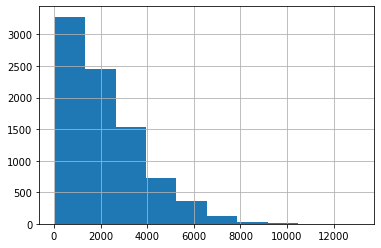

In [7]:
#Checking distribution of target variable
Bigmart_sales['Item_Outlet_Sales'].hist()

In [8]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
Bigmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Looking at the descriptive statistics of the data
Bigmart_sales.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [10]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
Bigmart_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Basic Data Exploration Results

* <b>Item_Identifier</b> : Qualatative column.Can be removed
* <b>Item_Weight</b> : Continuous column. Selected.
* <b>Item_Fat_Content</b> : Categorical column. Selected.
* <b>Item_Visibility</b> : Continuous column. Selected.
* <b>Item_Type</b> : Categorical column. Selected.
* <b>Item_MRP</b> : Continuous column. Selected.
* <b>Outlet_Identifier</b> : Categorical column.Selected.
* <b>Outlet_Establishment_Year</b> : Categorical column. Selecetd.
* <b>Outlet_Size</b> : Categorical column. Selected.
* <b>Outlet_Location_Type</b> : Categorical column. Selected.
* <b>Outlet_Type</b> : Categorical column.Selected.
* <b>Item_Outlet_Sales</b> : Continuous column. This is Target variable.

# Removing useless columns from the data


In [11]:
Bigmart_sales.drop(columns='Item_Identifier',axis = 1,inplace=True)

In [12]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(30,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

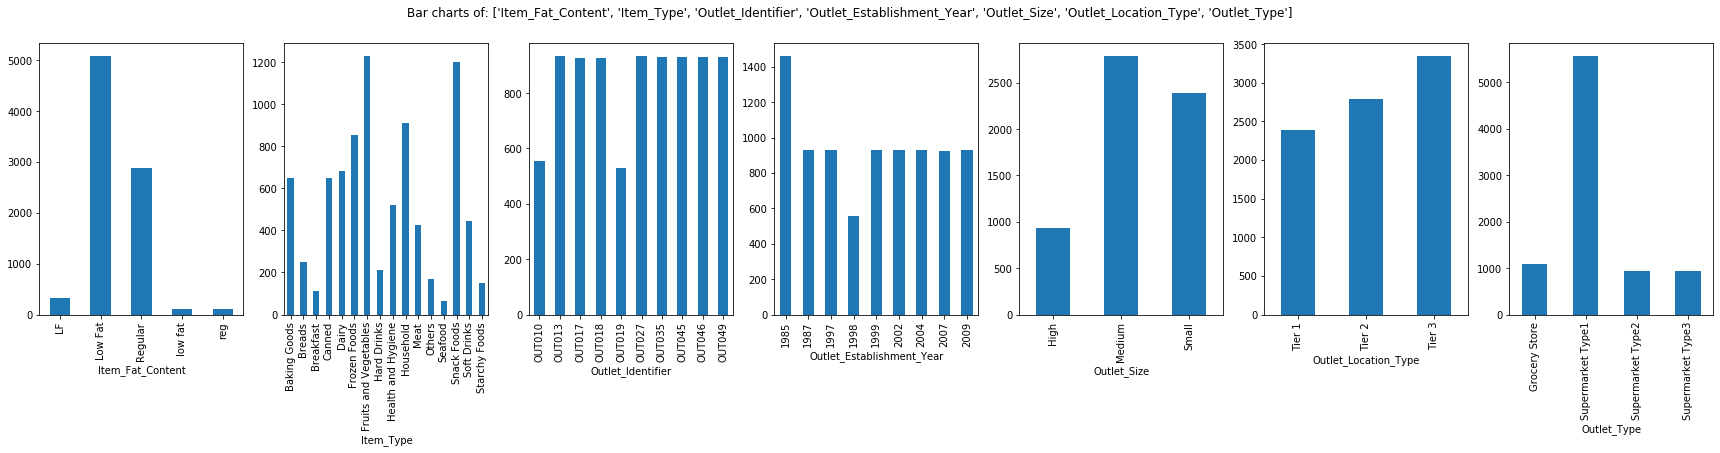

In [13]:
PlotBarCharts(inpData = Bigmart_sales,
              colsToPlot = ['Item_Fat_Content','Item_Type','Outlet_Identifier',
                            'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

### All categorical variables are selected for further analysis

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Three continuous predictor variables 'Item_Weight',
'Item_Visibility','Item_MRP' and 'Item_Outlet_Sales'.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215327DDEC8>,
      dtype=object)

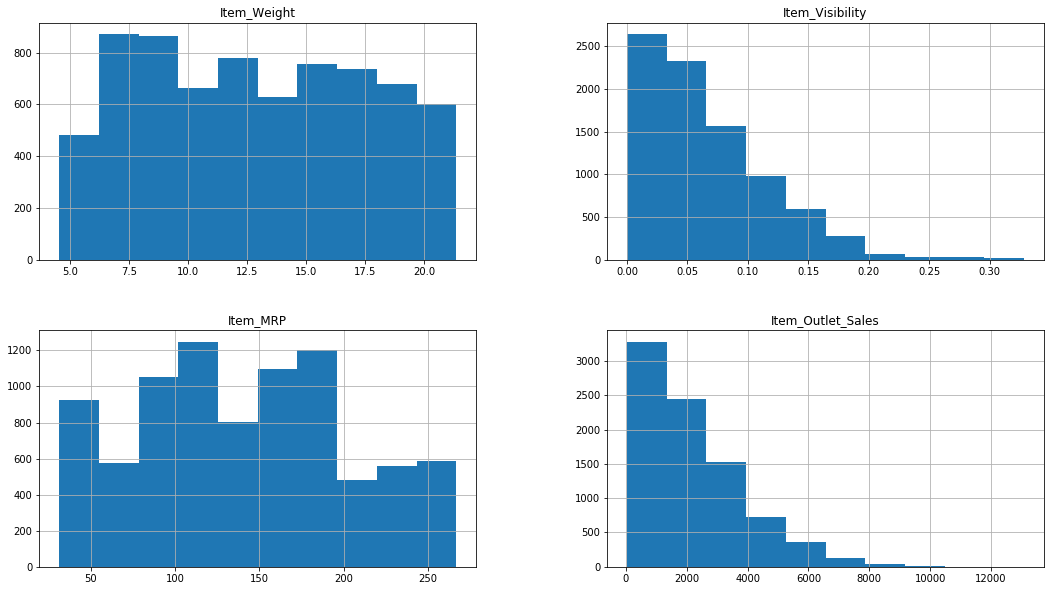

In [14]:
# Plotting histograms of multiple columns together
Bigmart_sales.hist(['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'], figsize=(18,10))

## Boxplots to check for outliers

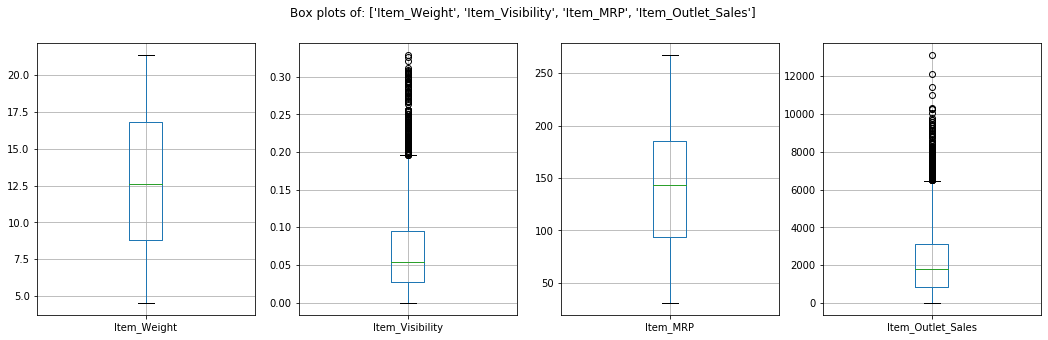

In [15]:
contcollist = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

import matplotlib.pyplot as plt
fig, plotcanvas = plt.subplots(nrows = 1, ncols=len(contcollist),figsize=(18,5))
fig.suptitle("Box plots of: "+str(contcollist))

for colname,plotnumber in zip(contcollist,range(len(contcollist))):
    Bigmart_sales.boxplot(column=colname,figsize=(5,5),vert=True,ax=plotcanvas[plotnumber])

<b>Selected Continuous variables</b> : 
From boxplots, it it obvious that Item_Visibility and Item_Outlet_Sales are having outliers. So those columns need to be treated.

## Treating outlier for 'Item_Visibility' 

In [16]:
Bigmart_sales['Item_Visibility'][Bigmart_sales['Item_Visibility']<0.35].sort_values(ascending=False)

854     0.328391
3750    0.325781
1805    0.321115
7250    0.311090
2855    0.309390
          ...   
2644    0.000000
5369    0.000000
7653    0.000000
2638    0.000000
3693    0.000000
Name: Item_Visibility, Length: 8523, dtype: float64

In [17]:
Bigmart_sales['Item_Visibility'][Bigmart_sales['Item_Visibility']>0.35] = 0.33

# Visualizing the distribution again after outlier treatment

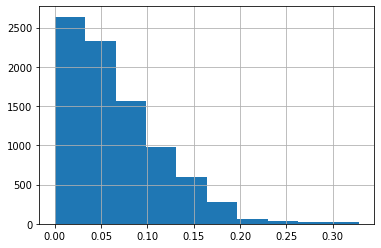

In [18]:
Bigmart_sales['Item_Visibility'].hist()

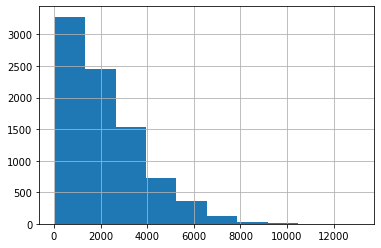

In [19]:
Bigmart_sales['Item_Outlet_Sales'].hist()

## Checking for missing values

In [20]:
Bigmart_sales.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
## Replacing null values with Median and Mode values
Bigmart_sales['Item_Weight'].fillna(value = Bigmart_sales['Item_Weight'].median(),inplace = True)
Bigmart_sales['Outlet_Size'].fillna(value = Bigmart_sales['Outlet_Size'].mode()[0],inplace = True)

In [22]:
#Checking for missing values
Bigmart_sales.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

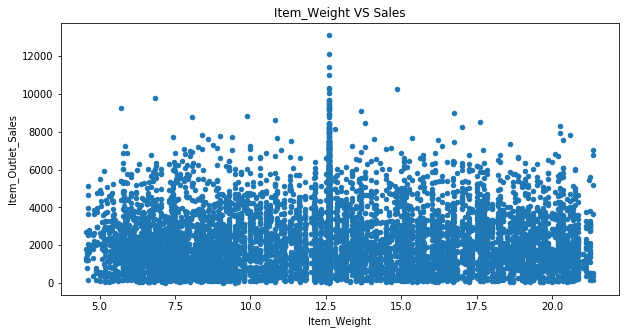

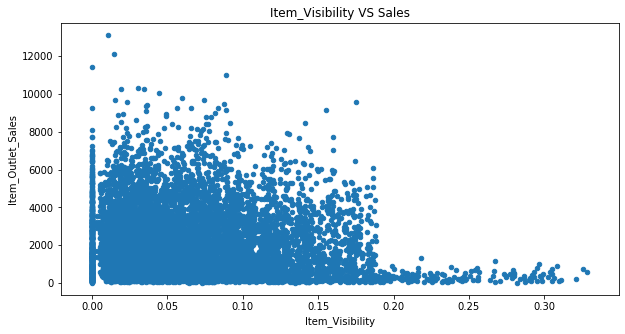

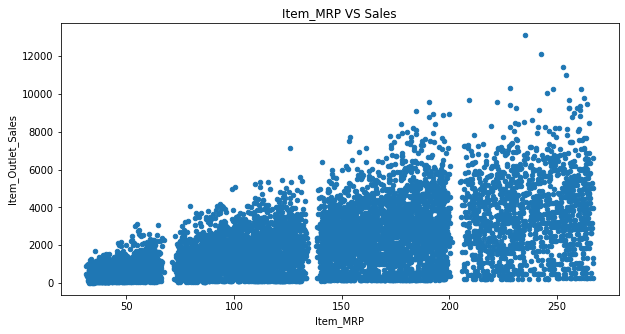

In [23]:
contcols = ['Item_Weight','Item_Visibility','Item_MRP']

# Plotting scatter chart
for predictor in contcols:
    Bigmart_sales.plot.scatter(x=predictor, y='Item_Outlet_Sales', figsize=(10,5), title=predictor+" VS "+ 'Sales')

In [24]:
#Correlation matrix
contcols = ['Item_Outlet_Sales','Item_Weight','Item_Visibility','Item_MRP']

corrdata = Bigmart_sales[contcols].corr()
corrdata

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP
Item_Outlet_Sales,1.000000,0.009693,-0.128625,0.567574
Item_Weight,0.009693,1.000000,-0.014168,0.024951
Item_Visibility,-0.128625,-0.014168,1.000000,-0.001315
Item_MRP,0.567574,0.024951,-0.001315,1.000000


In [25]:
corrdata['Item_Outlet_Sales'][abs(corrdata['Item_Outlet_Sales'])>0.5]

Item_Outlet_Sales    1.000000
Item_MRP             0.567574
Name: Item_Outlet_Sales, dtype: float64

<b>Final selected continuous columns:</b>
Item_MRP

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

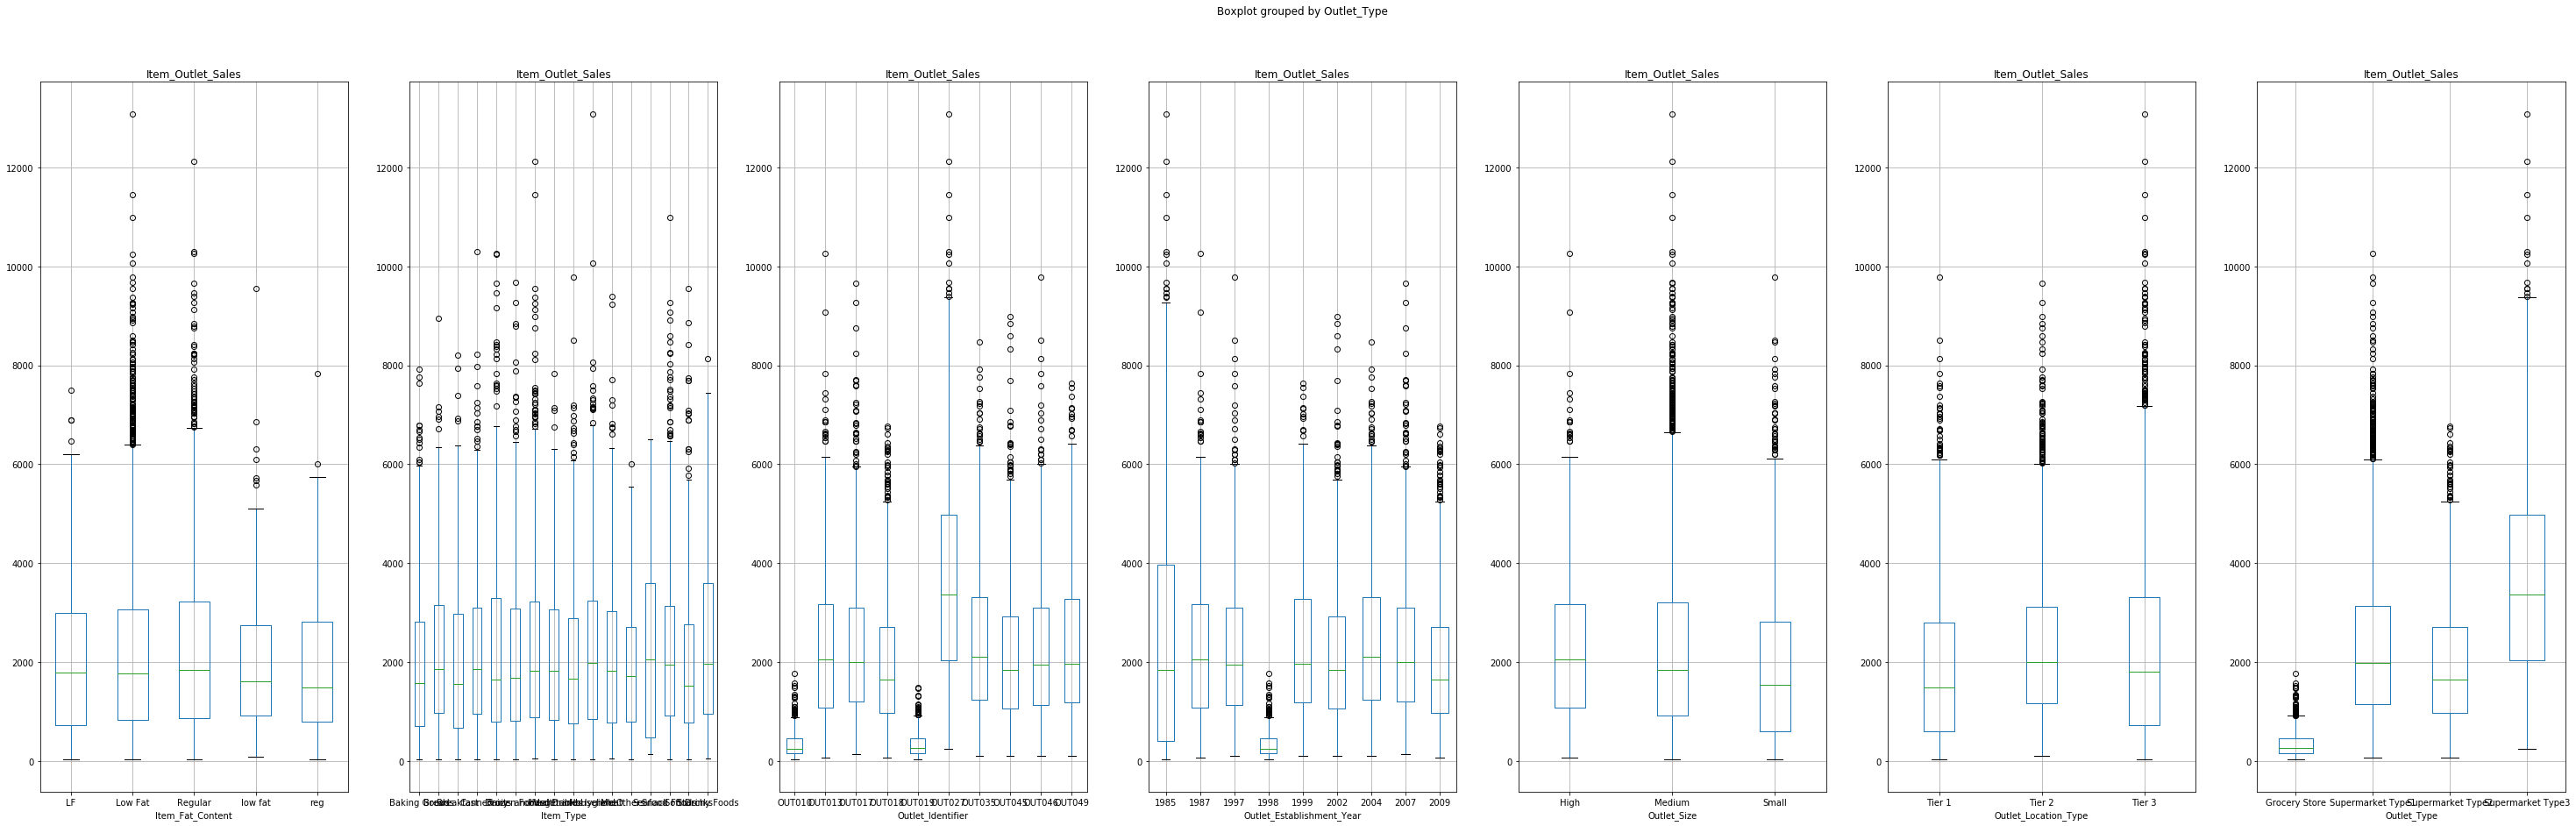

In [26]:
# Boxplots for target variable 'Sales' and categorical predictor columns
Catcols = ['Item_Fat_Content','Item_Type','Outlet_Identifier',
                            'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(Catcols), figsize=(50,15))

# Creating box plots for each categorical predictor against the Target Variable "Sales"
for PredictorCol , i in zip(Catcols, range(len(Catcols))):
    Bigmart_sales.boxplot(column='Item_Outlet_Sales', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [27]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [28]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Item_Fat_Content','Item_Type','Outlet_Identifier',
                            'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
FunctionAnova(inpData=Bigmart_sales, 
              TargetVariable='Item_Outlet_Sales', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Item_Fat_Content is NOT correlated with Item_Outlet_Sales | P-Value: 0.14122147854932424
Item_Type is correlated with Item_Outlet_Sales | P-Value: 0.00038843993766501125
Outlet_Identifier is correlated with Item_Outlet_Sales | P-Value: 0.0
Outlet_Establishment_Year is correlated with Item_Outlet_Sales | P-Value: 6.744877880160888e-164
Outlet_Size is correlated with Item_Outlet_Sales | P-Value: 9.642803947830672e-19
Outlet_Location_Type is correlated with Item_Outlet_Sales | P-Value: 5.2228172988842975e-24
Outlet_Type is correlated with Item_Outlet_Sales | P-Value: 0.0


['Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<b> Final selected categorical columns : </b>
'Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [29]:
SelectedColumns=['Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_MRP']

# Selecting final columns
DataForML=Bigmart_sales[SelectedColumns]
DataForML.head()

,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_MRP
0,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1,249.8092
1,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2,48.2692
2,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1,141.6180
3,Fruits and Vegetables,OUT010,1998,Medium,Tier 3,Grocery Store,182.0950
4,Household,OUT013,1987,High,Tier 3,Supermarket Type1,53.8614


In [30]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
<b> Converting the nominal variable to numeric using label encoder </b>

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Var_mod = ['Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in Var_mod:
    DataForML[i] = le.fit_transform(DataForML[i])

In [32]:
DataForML['Item_Outlet_Sales'] = Bigmart_sales['Item_Outlet_Sales']

# Machine Learning: Splitting the data into Training and Testing sample

In [33]:
# Separate Target Variable and Predictor Variables
TargetVariable = 'Item_Outlet_Sales'
Predictors = ['Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_MRP']

X = DataForML[Predictors].values
y = DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [34]:
X_train[0:4]

array([[ 13.    ,   0.    ,   3.    ,   1.    ,   2.    ,   0.    ,
         58.3588],
       [  5.    ,   8.    ,   2.    ,   2.    ,   0.    ,   1.    ,
        110.2886],
       [  8.    ,   3.    ,   8.    ,   1.    ,   2.    ,   2.    ,
        240.9196],
       [  0.    ,   2.    ,   7.    ,   1.    ,   1.    ,   1.    ,
         39.2848]])

# Multiple Linear Regression

In [35]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Item_Outlet_Sales']-TestingDataResults['PredictedItem_Outlet_Sales']))/TestingDataResults['Item_Outlet_Sales'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.5107045921373812

##### Model Validation and Accuracy Calculations ##########
   Item_Outlet_Sales  PredictedItem_Outlet_Sales
0          1231.7300                      1715.0
1           119.1782                       340.0
2          1030.6584                       833.0
3          1201.7690                       960.0
4           719.0640                      2614.0
Mean Accuracy on test data: 2.416905726016566
Median Accuracy on test data: 62.608128535009946

Accuracy values for 10-fold Cross Validation:
 [-0.61479701  2.12509241  7.53588025 -0.14047057  5.34810014 -0.62738987
  3.50770437  1.50038808 -5.91502351 -7.12969275]

Final Average Accuracy of the model: 0.56


In [36]:
TestingDataResults.head()

,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_MRP,Item_Outlet_Sales,PredictedItem_Outlet_Sales,APE
0,4.0,1.0,1.0,0.0,2.0,1.0,122.9730,1231.7300,1715.0,39.235060
1,4.0,0.0,3.0,1.0,2.0,0.0,120.3782,119.1782,340.0,185.287074
2,11.0,8.0,2.0,2.0,0.0,1.0,56.2588,1030.6584,833.0,19.177877
3,9.0,7.0,5.0,1.0,1.0,1.0,61.3510,1201.7690,960.0,20.117760
4,13.0,1.0,1.0,0.0,2.0,1.0,180.4660,719.0640,2614.0,263.528142


In [37]:
import sklearn
from sklearn.tree import DecisionTreeRegressor 

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.5255285233795589

##### Model Validation and Accuracy Calculations ##########
   Item_Outlet_Sales  PredictedItem_Outlet_Sales
0          1231.7300                      1851.0
1           119.1782                       256.0
2          1030.6584                       839.0
3          1201.7690                       839.0
4           719.0640                      3155.0
Mean Accuracy on test data: 37.29339393928255
Median Accuracy on test data: 66.55421711145837

Accuracy values for 10-fold Cross Validation:
 [35.45497169 34.91335407 35.91524667 38.1849548  35.39090308 40.90298508
 39.81959322 36.53155672 40.68220345 39.32252319]

Final Average Accuracy of the model: 37.71


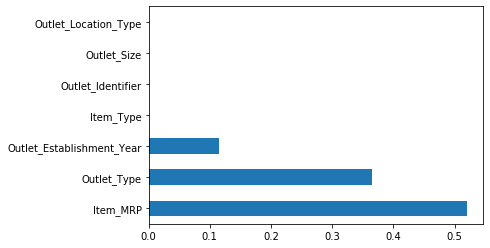

In [38]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Item_Outlet_Sales']-TestingDataResults['PredictedItem_Outlet_Sales']))/TestingDataResults['Item_Outlet_Sales'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[15:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.6898145998620759

##### Model Validation and Accuracy Calculations ##########
   Item_Outlet_Sales  PredictedItem_Outlet_Sales
0          1231.7300                 

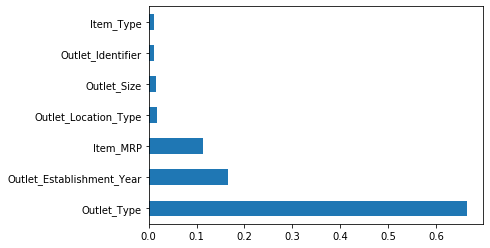

In [40]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Item_Outlet_Sales']-TestingDataResults['PredictedItem_Outlet_Sales']))/TestingDataResults['Item_Outlet_Sales'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [43]:
# importing test file
Bigmart_sales_test = pd.read_csv(r'E:\Analytics_vidya\Hackathon_3(Bigmart_sales)\test_AbJTz2l.csv')

In [44]:
#remove duplicate columns
print("Shape before deleting duplicates: ",Bigmart_sales_test.shape)
Bigmart_sales.drop_duplicates
print("Shape after deleting duplicates: ",Bigmart_sales_test.shape)

Bigmart_sales_test.head(10)

Shape before deleting duplicates:  (5681, 11)
Shape after deleting duplicates:  (5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [45]:
# Treating outliers
Bigmart_sales_test['Item_Visibility'][Bigmart_sales_test['Item_Visibility']<0.35].sort_values(ascending=False)

2609    0.323637
4208    0.313935
2843    0.313542
858     0.310377
1256    0.308259
          ...   
4339    0.000000
5410    0.000000
4351    0.000000
4367    0.000000
4120    0.000000
Name: Item_Visibility, Length: 5681, dtype: float64

In [46]:
Bigmart_sales_test['Item_Visibility'][Bigmart_sales_test['Item_Visibility']>0.35] = 0.33

In [47]:
#Treating missing values
Bigmart_sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [48]:
## Replacing null values with Median and Mode values
Bigmart_sales_test['Item_Weight'].fillna(value = Bigmart_sales_test['Item_Weight'].median(),inplace = True)
Bigmart_sales_test['Outlet_Size'].fillna(value = Bigmart_sales_test['Outlet_Size'].mode()[0],inplace = True)

In [49]:
Bigmart_sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [50]:
Bigmart_sales_test.drop(columns = ['Item_Fat_Content','Item_Visibility','Item_Weight'],axis = 1,inplace = True)

In [51]:
Selected_columns_test = ['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_MRP']
Dataforml_test = Bigmart_sales_test[Selected_columns_test]
Dataforml_test.head()

,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_MRP
0,FDW58,Snack Foods,OUT049,1999,Medium,Tier 1,Supermarket Type1,107.8622
1,FDW14,Dairy,OUT017,2007,Medium,Tier 2,Supermarket Type1,87.3198
2,NCN55,Others,OUT010,1998,Medium,Tier 3,Grocery Store,241.7538
3,FDQ58,Snack Foods,OUT017,2007,Medium,Tier 2,Supermarket Type1,155.0340
4,FDY38,Dairy,OUT027,1985,Medium,Tier 3,Supermarket Type3,234.2300


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Var_mod = ['Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in Var_mod:
    Dataforml_test[i] = le.fit_transform(Dataforml_test[i])

In [53]:
Dataforml_test.drop('Item_Identifier',axis = 1,inplace=True)

In [54]:
# Prediction on given test data
Item_Identifier = Bigmart_sales_test['Item_Identifier']
Outlet_Identifier = Bigmart_sales_test['Outlet_Identifier']
prediction = LREG.predict(Dataforml_test)

In [55]:
# Creating final submission file in csv format
final_output = pd.DataFrame({'Item_Identifier':Item_Identifier,'Outlet_Identifier':Outlet_Identifier,'Item_Outlet_Sales':prediction})

In [56]:
final_output.to_csv('Submission.csv',index=False)